In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
from context_inhibition import context_inhibition
from extn_rw_models import *
from plotnine import *

In [2]:
model = refined
save_plots = True
print(model.pars)

par_vals = {'refined': [0.000, 0.01, 0.5, 5.0]} # to make this fair it's important to either refine the experiment simulation or make the drate 0

            min   max  default
drate       0.0   0.5     0.25
lrate_min   0.0   0.5     0.10
power       0.0   2.0     0.50
resp_scale  0.0  10.0     1.00


In [3]:
print('massed')

trials = context_inhibition.make_trials('summation_massed')
ds_sum_msd = model.simulate(trials, par_vals[model.name])

trials = context_inhibition.make_trials('control_massed')
ds_ctl_msd = model.simulate(trials, par_vals[model.name])

print(context_inhibition.oats['massed'].compute_total({'summation_massed': ds_sum_msd, 'control_massed': ds_ctl_msd}))
print(context_inhibition.oats['massed'].mean_resp({'summation_massed': ds_sum_msd, 'control_massed': ds_ctl_msd}))

trials = context_inhibition.make_trials('summation_spaced')
ds_sum_spc = model.simulate(trials, par_vals[model.name])

trials = context_inhibition.make_trials('control_spaced')
ds_ctl_spc = model.simulate(trials, par_vals[model.name])

massed
0.1132162522813821
           schedule      trial_name u_name  mean_resp
0    control_massed  cs2 -> nothing     us   0.910755
0  summation_massed  cs2 -> nothing     us   0.797539


In [4]:
print('spaced')

trials = context_inhibition.make_trials('summation_spaced')
ds_sum_spc = model.simulate(trials, par_vals[model.name])

trials = context_inhibition.make_trials('control_spaced')
ds_ctl_spc = model.simulate(trials, par_vals[model.name])

print(context_inhibition.oats['spaced'].compute_total({'summation_spaced': ds_sum_spc, 'control_spaced': ds_ctl_spc}))
print(context_inhibition.oats['spaced'].mean_resp({'summation_spaced': ds_sum_spc, 'control_spaced': ds_ctl_spc}))

spaced
0.03128193495503928
           schedule      trial_name u_name  mean_resp
0    control_spaced  cs2 -> nothing     us   0.910755
0  summation_spaced  cs2 -> nothing     us   0.879473


Compare to Figure 1 in Polack, Laborda and Miller (2012).
  spacing  condition         b
0  massed  summation  0.797539
1  massed    control  0.910755
2  spaced  summation  0.879473
3  spaced    control  0.910755


/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4 x 4 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_context_inhibition_b_refined.jpeg


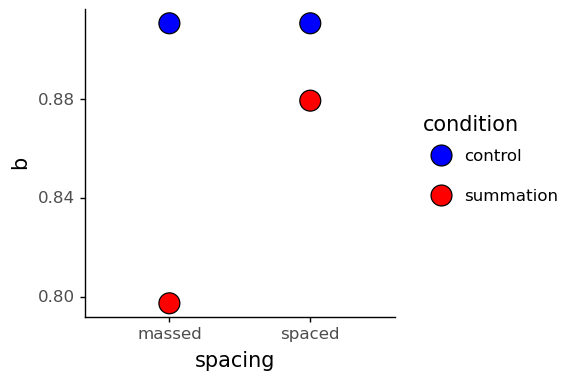

In [5]:
print('Compare to Figure 1 in Polack, Laborda and Miller (2012).')

df = pd.DataFrame({'spacing': ['massed', 'massed', 'spaced', 'spaced'],
                   'condition': ['summation', 'control', 'summation', 'control'],
                   'b': [ds_sum_msd['b'].values[-1][0],
                         ds_ctl_msd['b'].values[-1][0],
                         ds_sum_spc['b'].values[-1][0],
                         ds_ctl_spc['b'].values[-1][0]]})
print(df)

plot_b = ggplot(df, aes(x = 'spacing', fill = 'condition', y = 'b'))
plot_b += scale_fill_manual(values = {'summation': 'red', 'control': 'blue'})
plot_b += geom_point(size = 8)
plot_b += theme_classic(base_size = 15)
plot_b += theme(figure_size = (4, 4))
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/rw_context_inhibition_b_' + model.name + '.jpeg', dpi = 300)

/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4 x 4 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_context_inhibition_w_refined.jpeg


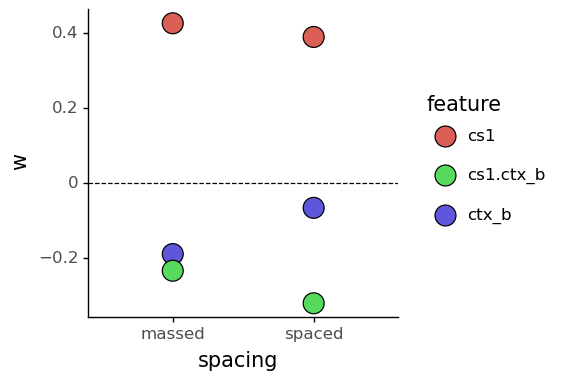

In [6]:
df_w = pd.DataFrame({'spacing': 3*['massed'] + 3*['spaced'],
                     'feature': 2*['cs1', 'ctx_b', 'cs1.ctx_b'],
                     'w': [ds_sum_msd['w'].loc[{'f_name': 'cs1'}].values[-1][0],
                           ds_sum_msd['w'].loc[{'f_name': 'ctx_b'}].values[-1][0],
                           ds_sum_msd['w'].loc[{'f_name': 'cs1.ctx_b'}].values[-1][0],
                           ds_sum_spc['w'].loc[{'f_name': 'cs1'}].values[-1][0],
                           ds_sum_spc['w'].loc[{'f_name': 'ctx_b'}].values[-1][0],
                           ds_sum_spc['w'].loc[{'f_name': 'cs1.ctx_b'}].values[-1][0]]})

plot_w = ggplot(df_w, aes(x = 'spacing', fill = 'feature', y = 'w'))
plot_w += geom_point(size = 8)
plot_w += theme_classic(base_size = 15)
plot_w += theme(figure_size = (4, 4))
plot_w += geom_hline(yintercept = 0, linetype = 'dashed')
plot_w.draw()
if save_plots:
    plot_w.save(filename = 'plots/rw_context_inhibition_w_' + model.name + '.jpeg', dpi = 300)